<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [8]:
df = pd.read_csv("m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [21]:
import scipy

In [22]:
import matplotlib.pyplot as plt

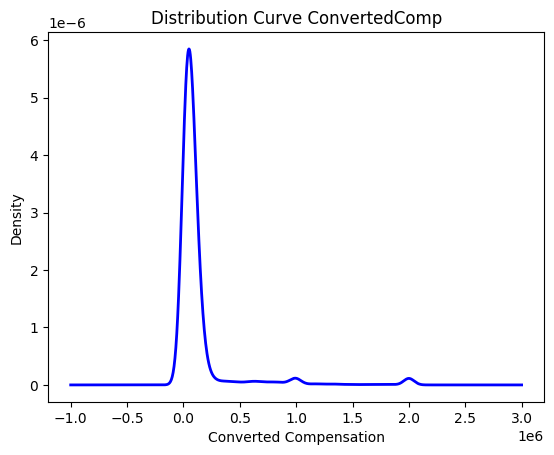

In [28]:
# your code goes here
df['ConvertedComp'].plot(kind='density', color='blue', linewidth=2)

# Add labels and title
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.title('Distribution Curve ConvertedComp')


# Show plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


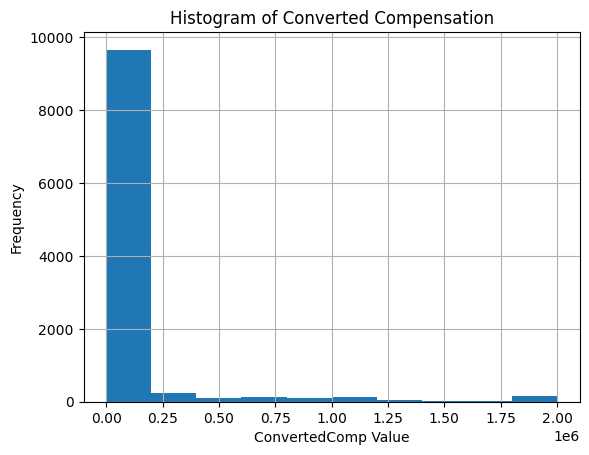

In [44]:
# your code goes here
df['ConvertedComp'].hist()

# Add labels and title
plt.xlabel('ConvertedComp Value')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

# Show plot
plt.show()

What is the median of the column `ConvertedComp`?


In [30]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [47]:
# your code goes here
man_count = df[df['Gender'] == 'Man']['Gender'].value_counts()[0]
print("Responders identifying as a Man:", man_count)

Responders identifying as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [49]:
# your code goes here
woman_count = df[df['Gender'] == 'Woman']['Gender'].value_counts()[0]
print("Responders identifying as a Woman:", woman_count)

Responders identifying as a Woman: 731


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [60]:
# your code goes here
min_age = df['Age'].min().astype(int)
q1_age = df['Age'].quantile(0.25).astype(int)
median_age = df['Age'].median().astype(int)
q3_age = df['Age'].quantile(0.75).astype(int)
max_age = df['Age'].max().astype(int)
print("Minimum Age:", min_age, "\nQ1:", q1_age, "\nMedian Age:", median_age, "\nQ3:", q3_age, "\nMax Age:", max_age)

Minimum Age: 16 
Q1: 25 
Median Age: 29 
Q3: 35 
Max Age: 99


Plot a histogram of the column `Age`.


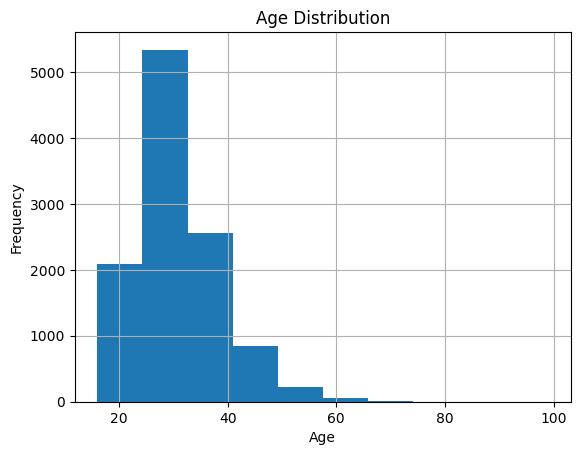

In [61]:
# your code goes here
df['Age'].hist()

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


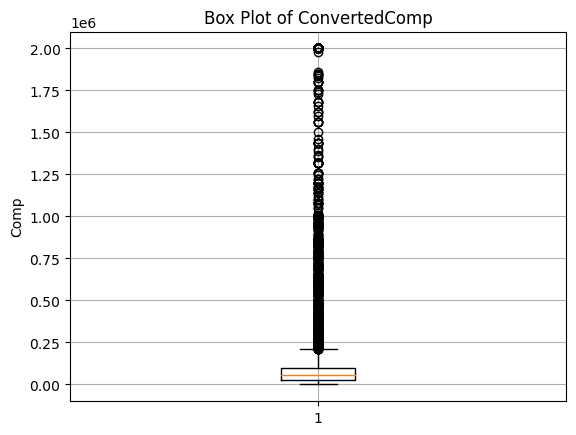

In [90]:
# your code goes here
ConvertedComp_null_removed = df['ConvertedComp'].dropna()
plt.boxplot(ConvertedComp_null_removed)
plt.ylabel('Comp')
plt.title('Box Plot of ConvertedComp')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [91]:
# your code goes here
Q1_ConvertedComp = ConvertedComp_null_removed.quantile(0.25)
Q3_ConvertedComp = ConvertedComp_null_removed.quantile(0.75)
IQR_ConvertedComp = Q3_ConvertedComp - Q1_ConvertedComp
print("Inter Quartile Range for ConvertedComp:", IQR_ConvertedComp)

Inter Quartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [92]:
# your code goes here
lower_bound_ConvertedComp = Q1_ConvertedComp - (1.5*IQR_ConvertedComp)
upper_bound_ConvertedComp = Q3_ConvertedComp + (1.5*IQR_ConvertedComp)
print("Lower Bound:", lower_bound_ConvertedComp, "\nUpper Bound:", upper_bound_ConvertedComp)

Lower Bound: -82830.0 
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [95]:
# your code goes here
outliers_CC = ConvertedComp_null_removed[ConvertedComp_null_removed > upper_bound_ConvertedComp].value_counts().sum()
print("Total Outliers:", outliers_CC)

Total Outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [100]:
without_outliers_CC = ConvertedComp_null_removed[ConvertedComp_null_removed <= upper_bound_ConvertedComp]
new_CC_df = pd.DataFrame(without_outliers_CC)
new_CC_df.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
4,65277.0
5,31140.0


In [101]:

print("Orginal:",df['ConvertedComp'].value_counts().sum(), "\nwithout outliers:", without_outliers_CC.value_counts().sum(), "\nOutliers:", outliers_CC)

Orginal: 10582 
without outliers: 9703 
Outliers: 879


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [106]:
# your code goes here
age_correlation = df.corr(numeric_only=True)['Age']
age_correlation

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
